# Set up project

In [51]:
# Install tmdbsimple (only need to run once)
!pip install tmdbsimple

In [52]:
 !pip install tqdm

In [54]:
# open the json
import json
with open("C:\\Users\\Elizabeth Spreng\\.secret\\tmbd_api.json", 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [55]:
# load tmbd simple
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [56]:
#import libraries
import pandas as pd

#import 
from tqdm.notebook import trange, tqdm
from tqdm.notebook import tqdm_notebook 

## Set up Functions

## Create the Movie ID query
- revenue
- budget
- certification

In [57]:
## make a movie object using the .Movies function from tmdb
movie = tmdb.Movies(603)


In [58]:
## movie objects have a .info dictionary 
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/l4QHerTSbMI7qgvasqxP36pqjN6.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 119.14,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [59]:
# get total of budget
info['budget']


63000000

In [60]:
# get total count for revenue
info['revenue']


463517383

In [61]:
# get the refenrence number for movie id
info['imdb_id']

'tt0133093'

## Construct movie with rating function

## Create Loops for API Call

### Before the loop

In [62]:
# Get the movie object for the current id
movie = tmdb.Movies('tt1361336')
# save the .info .releases dictionaries
info = movie.info()
releases = movie.releases()
# Loop through countries in releases
for c in releases['countries']:
    # if the country abbreviation==US
    if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
       info['certification'] = c['certification']


In [63]:
test = get_movie_with_rating("tt0848228") #put your function name here
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 162.35,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path'

In [64]:
import os, time,json
import tmdbsimple as tmdb 
FOLDER = "Data3/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)


['title_aka.csv.gz',
 'title_basics.csv.gz',
 'title_rating.csv.gz',
 'tmdb_api_results_2000.json']

In [65]:
def get_movie_with_rating(movie_id):
    #get the movie and release dates
    movie = tmdb.Movies(movie_id)
    ##contruct output dict
    info = movie.info()
    releases = movie.releases()
    for c in releases['countries']:
        if c['iso_3166_1'] == 'US':
            info['certification'] = c['certification']
    return info

In [75]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [76]:
# define years
YEARS_TO_GET = [2000,2001]

In [78]:
# define errors
errors = [ ]

In [ ]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [95]:
YEAR = 2000

In [96]:
#Defining the JSON file to store results for year
JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'

In [97]:
# Check if file exists
file_exists = os.path.isfile(JSON_FILE)

In [98]:
# Load in the dataframe from project part 1 as basics:
basics = pd.read_csv('Data3/title_basics.csv.gz')

In [99]:
# If it does not exist: create i
if file_exists == False:
    # save an empty dict with just "imdb_id" to the new json file.
    with open(JSON_FILE,'w') as f:
        json.dump([{'imdb_id':0}],f)

In [100]:
#Saving new year as the current df
df = basics.loc[ basics['startYear']==YEAR].copy()

In [101]:
# saving movie ids to list
movie_ids = df['tconst'].copy()
movie_ids

7         tt0102362
13        tt0113026
14        tt0113092
18        tt0115937
19        tt0116391
            ...    
134252    tt9035132
134601    tt9088396
135220    tt9209606
136083    tt9412476
136353    tt9486348
Name: tconst, Length: 2740, dtype: object

In [102]:
# Load existing data from json into a dataframe called "previous_df"
previous_df = pd.read_json(JSON_FILE)
previous_df

,imdb_id
0,0


In [103]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)

    # If it does not exist: create it
    if file_exists == False:
    # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()

    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    movie_ids
    
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    previous_df

    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]



YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

In [104]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    #Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)

    # If it does not exist: create it
    if file_exists == False:
    # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    #Saving new year as the current df
    df = basics.loc[ basics['startYear']==YEAR].copy()

    # saving movie ids to list
    movie_ids = df['tconst'].copy()
    movie_ids
    
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    previous_df

    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            
        except Exception as e:
            continue
            #errors.append([movie_id, e])
            
    # save to file
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/2740 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/2866 [00:00<?, ?it/s]

In [249]:
print(f'-Total errors{len(errors)}

SyntaxError: EOL while scanning string literal (4289374870.py, line 1)

#  Exploratory Data

- How many movies had at least some valid financial information (values > 0 for budget OR revenue)? Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
- How many movies are there in each of the certification categories (G/PG/PG-13/R)?
- What is the average revenue per certification category?
- What is the average budget per certification category?

## Import libraries for EDA

In [119]:
# import libries
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Data

In [110]:
df_2000 = pd.read_csv('Data3/tmdb_api_results_2000.json')

In [111]:
df_2000.head()

,"[{""imdb_id"": 0}","{""adult"": false","""backdrop_path"": null","""belongs_to_collection"": null","""budget"": 0","""genres"": [{""id"": 878","""name"": ""Science Fiction""}]","""homepage"": """"","""id"": 110977","""imdb_id"": ""tt0113092""",...,"""runtime"": 95.79","""spoken_languages"": [{""english_name"": ""Arabic"".22","""iso_639_1"": ""ar"".22","""name"": ""\u0627\u0644\u0639\u0631\u0628\u064a\u0629""}].9","""status"": ""Released"".2194","""tagline"": """".1552","""title"": ""shajie alsiyama""","""video"": false.2188","""vote_average"": 4.5.22","""vote_count"": 2}]"


In [112]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 86142 entries, [{"imdb_id": 0} to  "vote_count": 2}]
dtypes: object(86142)
memory usage: 0.0+ bytes


In [114]:
# Read the data
df_api_2000 = pd.read_json('Data3/tmdb_api_results_2000.json')
df_api_2000.to_csv('Data3/tmdb_api_results_2000.json')

#df_2000 = pd.read_csv('Data3/title_basics.csv.gz')


### Inspect the 2000 Data

In [115]:
df_api_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113092,0.0,None,None,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,
2,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,None,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2162.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,None,0.0,"[{'id': 18, 'name': 'Drama'}]",,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.8,49.0,R


In [121]:
df_api_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2196 non-null   object 
 1   adult                  2195 non-null   float64
 2   backdrop_path          1002 non-null   object 
 3   belongs_to_collection  130 non-null    object 
 4   budget                 2195 non-null   float64
 5   genres                 2195 non-null   object 
 6   homepage               2195 non-null   object 
 7   id                     2195 non-null   float64
 8   original_language      2195 non-null   object 
 9   original_title         2195 non-null   object 
 10  overview               2195 non-null   object 
 11  popularity             2195 non-null   float64
 12  poster_path            1888 non-null   object 
 13  production_companies   2195 non-null   object 
 14  production_countries   2195 non-null   object 
 15  rele

In [120]:
df_api_2000['budget'].describe()

count    2.195000e+03
mean     2.826585e+06
std      1.257061e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.275000e+08
Name: budget, dtype: float64

### Inspect the 2001 Data

In [116]:
# Read the data
df_api_2001 = pd.read_json('Data3/tmdb_api_results_2001.json')
df_api_2001.to_csv('Data3/tmdb_api_results_2001.json')

In [117]:
df_api_2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,None,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1180.0,PG-13
2,tt0079644,0.0,/79axmuH1UGkB7m72jjB9rPff9om.jpg,None,0.0,"[{'id': 10752, 'name': 'War'}]",,285529.0,id,November 1828,...,0.0,140.0,"[{'english_name': 'Indonesian', 'iso_639_1': '...",Released,,November 1828,0.0,0.000,0.0,NaN
3,tt0114447,0.0,None,None,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
4,tt0114722,0.0,None,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",,276251.0,es,3 Noches,...,0.0,105.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,,3 Nights,0.0,0.000,0.0,


In [118]:
df_api_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2287 non-null   object 
 1   adult                  2286 non-null   float64
 2   backdrop_path          1024 non-null   object 
 3   belongs_to_collection  121 non-null    object 
 4   budget                 2286 non-null   float64
 5   genres                 2286 non-null   object 
 6   homepage               2286 non-null   object 
 7   id                     2286 non-null   float64
 8   original_language      2286 non-null   object 
 9   original_title         2286 non-null   object 
 10  overview               2286 non-null   object 
 11  popularity             2286 non-null   float64
 12  poster_path            1962 non-null   object 
 13  production_companies   2286 non-null   object 
 14  production_countries   2286 non-null   object 
 15  rele

In [174]:
#combine the two dataframes
combined_df = pd.concat([df_api_2000, df_api_2001], ignore_index=True, sort=False)

In [175]:
# create a total money column for revenue and budget over 0

In [176]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4483 entries, 0 to 4482
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4483 non-null   object 
 1   adult                  4481 non-null   float64
 2   backdrop_path          2026 non-null   object 
 3   belongs_to_collection  251 non-null    object 
 4   budget                 4481 non-null   float64
 5   genres                 4481 non-null   object 
 6   homepage               4481 non-null   object 
 7   id                     4481 non-null   float64
 8   original_language      4481 non-null   object 
 9   original_title         4481 non-null   object 
 10  overview               4481 non-null   object 
 11  popularity             4481 non-null   float64
 12  poster_path            3850 non-null   object 
 13  production_companies   4481 non-null   object 
 14  production_countries   4481 non-null   object 
 15  rele

### Visual #1

- - How many movies had at least some valid financial information (values > 0 for budget OR revenue)? Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

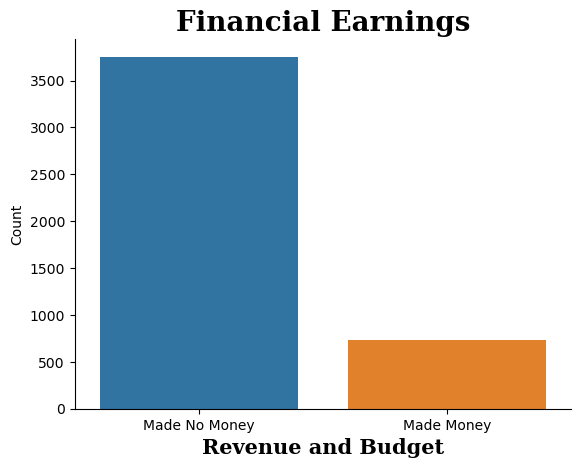

In [190]:
combined_monies = (combined_df["budget"]> 0) | (combined_df['revenue'] > 0)

plot=combined_df[combined_monies]

ax= sns.countplot(x=combined_monies)
ax.set_title('Financial Earnings', fontfamily='serif',fontsize = 20, fontweight = 'bold');
ax.set_xlabel('xxx', fontfamily= 'serif', fontsize = 15, fontweight = 'bold')
plt.xlabel('Revenue and Budget')
ax.set_xticklabels(['Made No Money', 'Made Money'])
plt.ylabel('Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


### Visual #2

-  How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [192]:
#check the certification counts
combined_df['certification'].value_counts()

           1029
R           468
PG-13       183
NR           76
PG           63
G            26
NC-17         7
Unrated       1
-             1
Name: certification, dtype: int64

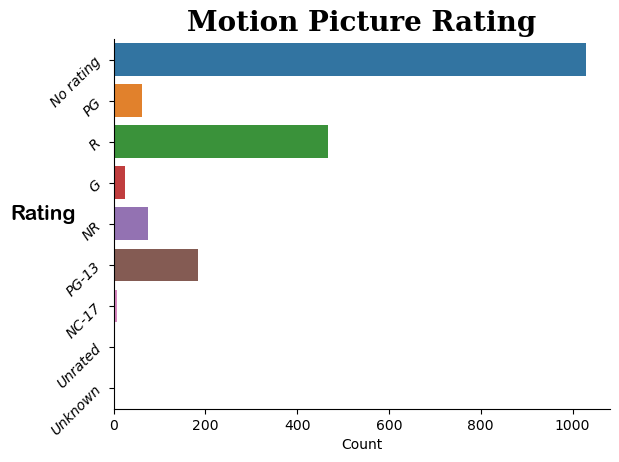

In [209]:
#create the countplot
ax= sns.countplot(data=combined_df, y='certification')
ax.set_title('Motion Picture Rating', fontfamily='serif',fontsize = 20, fontweight = 'bold');

plt.xlabel('Count')
plt.ylabel('Rating', fontfamily='Arial Rounded MT Bold', fontsize = 15, rotation = 0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticklabels(labels = ['No rating','PG', 'R', 'G', 'NR', 'PG-13','NC-17', 'Unrated', 'Unknown'], 
                   rotation=45, 
                   fontstyle='italic', 
                   color='black');

### Visual #3

- What is the average revenue per certification category?


In [162]:
#how do I use the combined monies filter to get the average by category
revenue_average = combined_df.groupby('certification')['revenue'].mean()
revenue_average
#sns.barplot(x=combined_df, )

certification
           1.515975e+06
-          0.000000e+00
G          6.663261e+07
NC-17      1.668286e+03
NR         2.144835e+06
PG         6.077067e+07
PG-13      6.807139e+07
R          1.610411e+07
Unrated    0.000000e+00
Name: revenue, dtype: float64

<AxesSubplot: ylabel='count'>

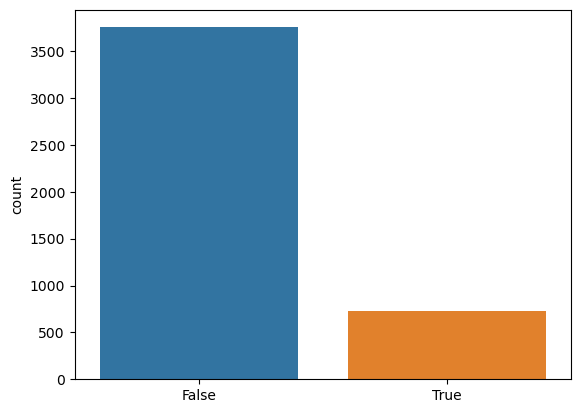

In [243]:
#total = combined_df['budget']
sns.countplot(x=revenue_average)

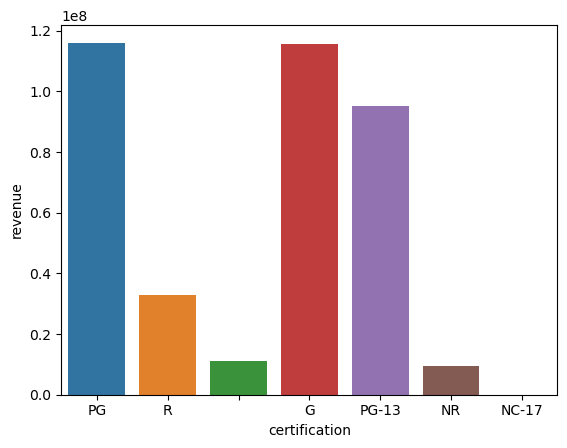

In [250]:
total= combined_df['budget'] + combined_df['revenue']
sns.barplot(data=plot, x='certification', y= 'revenue', errorbar=None);

In [245]:
sns.barplot(data=combined_df, x='certification', y= {revenue_average}, errorbar=None);

TypeError: unhashable type: 'Series'

In [ ]:
combined_df['combined_monies'] = (combined_df["budget"]> 0) + (combined_df['revenue'] > 0)

#means2 = combined_df.groupby('certification')[(combined_df["budget"]> 0) | (combined_df['revenue'] > 0)].mean().sort_values(ascending=False)
#means2
     

In [246]:
combined_df.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,combined_monies
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,tt0113092,0.0,None,None,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",,110977.0,en,For the Cause,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,,False


In [247]:
#sns.countplot(data=combined_data, x='revenue')

In [248]:
from matplotlib.font_manager import get_font_names

print(get_font_names())

['Trebuchet MS', 'Candara', 'Leelawadee UI', 'Wide Latin', 'Script MT Bold', 'Engravers MT', 'Eras Medium ITC', 'Lucida Calligraphy', 'STIXSizeTwoSym', 'Franklin Gothic Book', 'Chiller', 'Rockwell Condensed', 'MS Outlook', 'Playbill', 'Eras Demi ITC', 'Parchment', 'Constantia', 'DejaVu Serif Display', 'Segoe UI Emoji', 'Niagara Engraved', 'STIXSizeFourSym', 'HoloLens MDL2 Assets', 'STIXNonUnicode', 'Lucida Handwriting', 'Tw Cen MT Condensed', 'Calisto MT', 'Arial Rounded MT Bold', 'Webdings', 'Myanmar Text', 'Agency FB', 'Nirmala UI', 'Microsoft Sans Serif', 'Tahoma', 'Brush Script MT', 'Times New Roman', 'Microsoft YaHei', 'Haettenschweiler', 'Bahnschrift', 'Lucida Console', 'Gill Sans MT Ext Condensed Bold', 'Kristen ITC', 'Old English Text MT', 'Imprint MT Shadow', 'Rockwell Extra Bold', 'Matura MT Script Capitals', 'cmsy10', 'cmb10', 'Franklin Gothic Medium Cond', 'Perpetua Titling MT', 'Lucida Sans Unicode', 'Segoe UI', 'Gigi', 'Rockwell', 'Microsoft Yi Baiti', 'DejaVu Sans', 'Syl